In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

In [3]:
#class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
import numpy as np

# Create correlation matrix
corr_matrix = tracks.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.4)]

# Drop features 
tracks.drop(to_drop, axis=1, inplace=True)

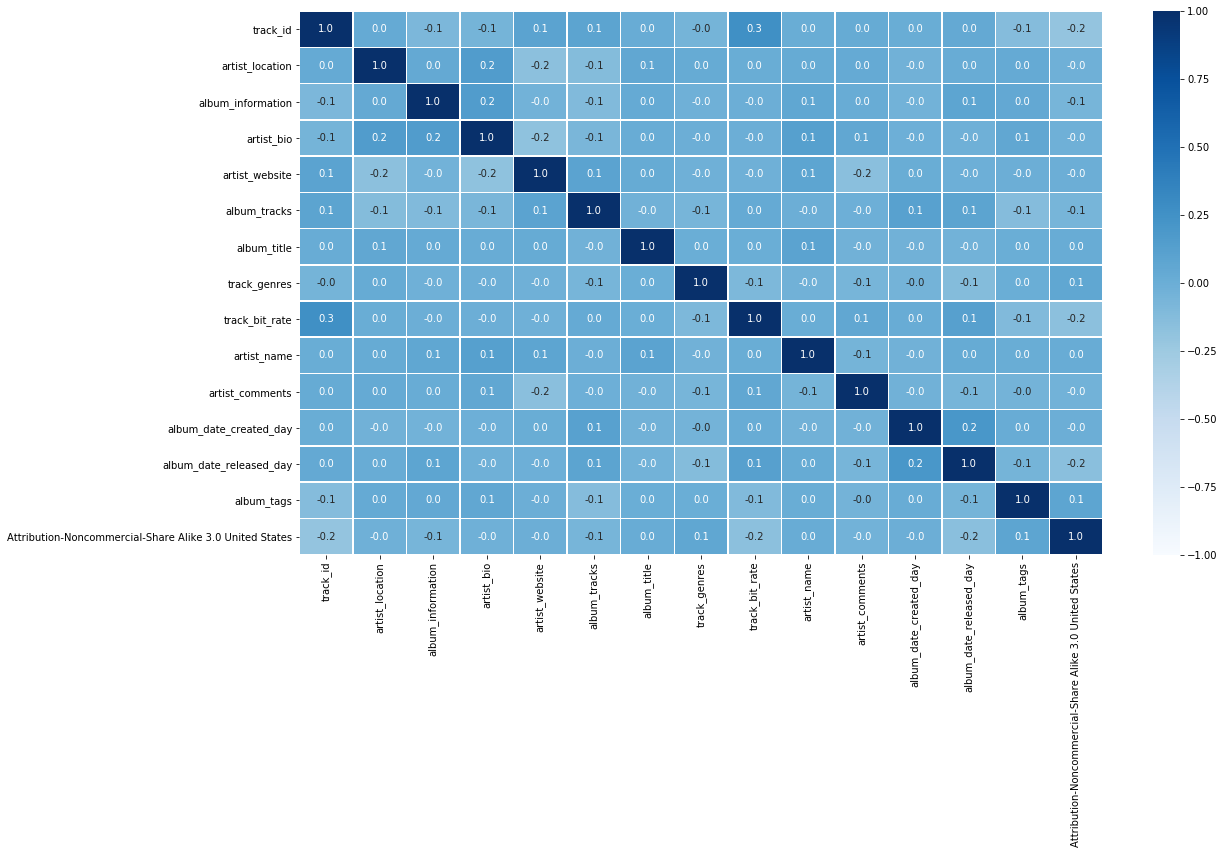

In [5]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18,10)) #Display a heatmap of the correlation matrix
sns.heatmap(tracks.corr(), annot=True, cmap="Blues", linewidths=0.5, linecolor="white", fmt=".1f", vmin=-1.0, vmax=1.0, ax=ax)
plt.show()

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   artist_location                                          99404 non-null  int64
 2   album_information                                        99404 non-null  int64
 3   artist_bio                                               99404 non-null  int64
 4   artist_website                                           99404 non-null  int64
 5   album_tracks                                             99404 non-null  int64
 6   album_title                                              99404 non-null  int64
 7   track_genres                                             99404 non-null  int64
 8   track_bit_rate                                

**GAUSSIANNB**

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred0=y_pred
y_score=clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7167527328817651
F1-score [0.81379918 0.40843196]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     24518
           1       0.32      0.55      0.41      5304

    accuracy                           0.72     29822
   macro avg       0.61      0.65      0.61     29822
weighted avg       0.79      0.72      0.74     29822



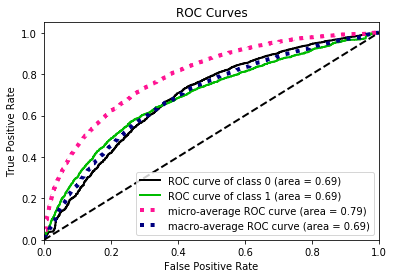

In [8]:
plot_roc(y_test, y_score)
plt.show()

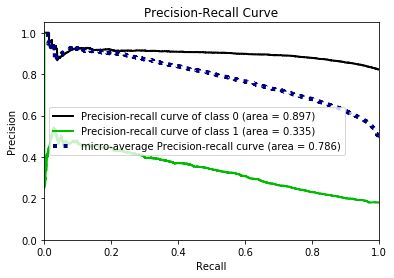

In [9]:
plot_precision_recall(y_test, y_score)
plt.show()

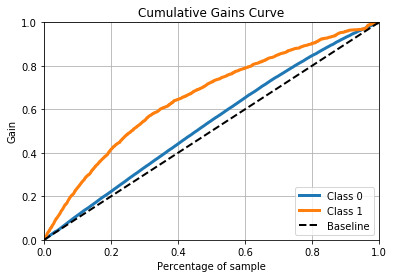

In [10]:
plot_cumulative_gain(y_test, y_score)
plt.show()

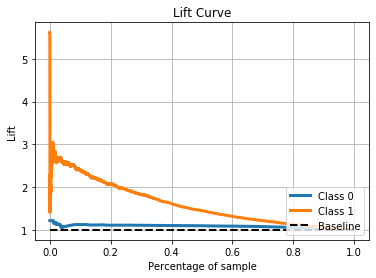

In [11]:
plot_lift_curve(y_test, y_score)
plt.show()

**CATEGORICALNB**

In [12]:
from sklearn.preprocessing import LabelEncoder
df0_cat=tracks[['album_date_released_day','artist_name']].apply(LabelEncoder().fit_transform)
X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    df0_cat, tracks[class_name], test_size=0.3, random_state=100, stratify=tracks[class_name])

In [13]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train)

CategoricalNB()

In [14]:
y_pred = clf.predict(X_test_cat)
y_pred1 =y_pred
y_score=clf.predict_proba(X_test_cat)

In [15]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9516799678090001
F1-score [0.97116212 0.85105943]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24518
           1       0.94      0.78      0.85      5304

    accuracy                           0.95     29822
   macro avg       0.95      0.88      0.91     29822
weighted avg       0.95      0.95      0.95     29822



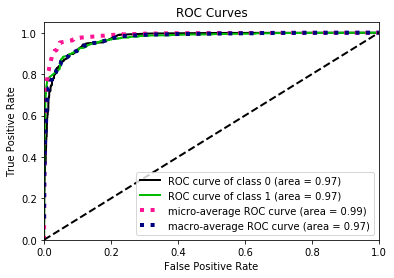

In [16]:
plot_roc(y_test, y_score)
plt.show()

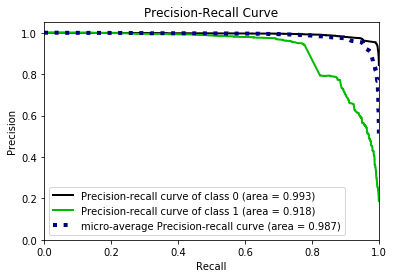

In [17]:
plot_precision_recall(y_test, y_score)
plt.show()

**BernoulliNB**

In [18]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 =y_pred
y_score=clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


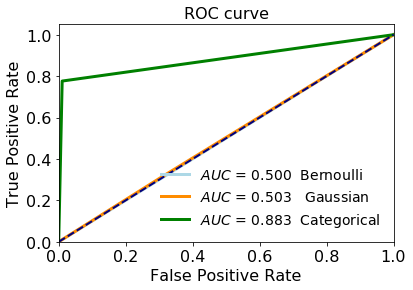

In [19]:
fpr0, tpr0, _ = roc_curve(y_test, y_pred0)
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)


plt.plot(fpr2, tpr2, color='lightblue', lw=3, label='$AUC$ = %.3f  Bernoulli' % (roc_auc2))
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC$ = %.3f   Gaussian' % (roc_auc0))
plt.plot(fpr1, tpr1, color='green', lw=3, label='$AUC$ = %.3f  Categorical' % (roc_auc1))


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [59]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  binarize : float or None, default=0.0
 |      Threshold for binarizing (mapping to booleans) of sample features.
 |      If None, input is presumed to already consist of binary vectors.
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior wil